In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# DataSet 2006

In [267]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2006.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2006-02-01 01:00:00,NaN,1.84,NaN,NaN,NaN,155.100006,490.100006,NaN,4.880000,97.570000,40.259998,NaN,33.779999,NaN,NaN,28079001
1,2006-02-01 01:00:00,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.100000,25.820000,NaN,2.48,11.890000,1.59,12.340000,28079035
2,2006-02-01 01:00:00,NaN,1.25,NaN,NaN,NaN,66.800003,192.000000,NaN,4.430000,34.419998,NaN,NaN,19.719999,NaN,NaN,28079003
3,2006-02-01 01:00:00,NaN,1.68,NaN,NaN,NaN,103.000000,407.799988,NaN,4.830000,28.260000,NaN,NaN,21.129999,NaN,NaN,28079004
4,2006-02-01 01:00:00,NaN,1.31,NaN,NaN,NaN,105.400002,269.200012,NaN,6.990000,54.180000,NaN,NaN,11.050000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230563,2006-05-01 00:00:00,5.88,0.83,6.23,NaN,0.20,112.500000,218.000000,NaN,24.389999,93.120003,NaN,NaN,7.400000,1.50,28.129999,28079023
230564,2006-05-01 00:00:00,0.76,0.32,0.48,1.09,0.08,51.900002,54.820000,0.61,48.410000,29.469999,15.640000,0.50,8.840000,1.32,2.310000,28079024
230565,2006-05-01 00:00:00,0.96,NaN,0.69,NaN,0.19,135.100006,179.199997,NaN,11.460000,64.680000,35.000000,NaN,12.110000,1.51,4.520000,28079026
230566,2006-05-01 00:00:00,0.50,NaN,0.67,NaN,0.10,82.599998,105.599998,NaN,NaN,94.360001,NaN,NaN,4.890000,1.47,4.050000,28079027


In [268]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230568 entries, 0 to 230567
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     230568 non-null  object 
 1   BEN      73979 non-null   float64
 2   CO       211665 non-null  float64
 3   EBE      73948 non-null   float64
 4   MXY      33422 non-null   float64
 5   NMHC     90829 non-null   float64
 6   NO_2     228855 non-null  float64
 7   NOx      228855 non-null  float64
 8   OXY      33472 non-null   float64
 9   O_3      216511 non-null  float64
 10  PM10     227469 non-null  float64
 11  PM25     61758 non-null   float64
 12  PXY      33447 non-null   float64
 13  SO_2     229125 non-null  float64
 14  TCH      90887 non-null   float64
 15  TOL      73840 non-null   float64
 16  station  230568 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 29.9+ MB


In [293]:
b=a.iloc[:,1:17]
b

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,NaN,1.84,NaN,NaN,NaN,155.100006,490.100006,NaN,4.880000,97.570000,40.259998,NaN,33.779999,NaN,NaN,28079001
1,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.100000,25.820000,NaN,2.48,11.890000,1.59,12.340000,28079035
2,NaN,1.25,NaN,NaN,NaN,66.800003,192.000000,NaN,4.430000,34.419998,NaN,NaN,19.719999,NaN,NaN,28079003
3,NaN,1.68,NaN,NaN,NaN,103.000000,407.799988,NaN,4.830000,28.260000,NaN,NaN,21.129999,NaN,NaN,28079004
4,NaN,1.31,NaN,NaN,NaN,105.400002,269.200012,NaN,6.990000,54.180000,NaN,NaN,11.050000,NaN,NaN,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230563,5.88,0.83,6.23,NaN,0.20,112.500000,218.000000,NaN,24.389999,93.120003,NaN,NaN,7.400000,1.50,28.129999,28079023
230564,0.76,0.32,0.48,1.09,0.08,51.900002,54.820000,0.61,48.410000,29.469999,15.640000,0.50,8.840000,1.32,2.310000,28079024
230565,0.96,NaN,0.69,NaN,0.19,135.100006,179.199997,NaN,11.460000,64.680000,35.000000,NaN,12.110000,1.51,4.520000,28079026
230566,0.50,NaN,0.67,NaN,0.10,82.599998,105.599998,NaN,NaN,94.360001,NaN,NaN,4.890000,1.47,4.050000,28079027


In [294]:
c=b.fillna(value=10)
c

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,10.00,1.84,10.00,10.00,10.00,155.100006,490.100006,10.00,4.880000,97.570000,40.259998,10.00,33.779999,10.00,10.000000,28079001
1,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.100000,25.820000,10.000000,2.48,11.890000,1.59,12.340000,28079035
2,10.00,1.25,10.00,10.00,10.00,66.800003,192.000000,10.00,4.430000,34.419998,10.000000,10.00,19.719999,10.00,10.000000,28079003
3,10.00,1.68,10.00,10.00,10.00,103.000000,407.799988,10.00,4.830000,28.260000,10.000000,10.00,21.129999,10.00,10.000000,28079004
4,10.00,1.31,10.00,10.00,10.00,105.400002,269.200012,10.00,6.990000,54.180000,10.000000,10.00,11.050000,10.00,10.000000,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230563,5.88,0.83,6.23,10.00,0.20,112.500000,218.000000,10.00,24.389999,93.120003,10.000000,10.00,7.400000,1.50,28.129999,28079023
230564,0.76,0.32,0.48,1.09,0.08,51.900002,54.820000,0.61,48.410000,29.469999,15.640000,0.50,8.840000,1.32,2.310000,28079024
230565,0.96,10.00,0.69,10.00,0.19,135.100006,179.199997,10.00,11.460000,64.680000,35.000000,10.00,12.110000,1.51,4.520000,28079026
230566,0.50,10.00,0.67,10.00,0.10,82.599998,105.599998,10.00,10.000000,94.360001,10.000000,10.00,4.890000,1.47,4.050000,28079027


In [295]:
d=c.head(1000)
d

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,10.00,1.84,10.00,10.00,10.00,155.100006,490.100006,10.00,4.88,97.570000,40.259998,10.00,33.779999,10.00,10.00,28079001
1,1.68,1.01,2.38,6.36,0.32,94.339996,229.699997,3.04,7.10,25.820000,10.000000,2.48,11.890000,1.59,12.34,28079035
2,10.00,1.25,10.00,10.00,10.00,66.800003,192.000000,10.00,4.43,34.419998,10.000000,10.00,19.719999,10.00,10.00,28079003
3,10.00,1.68,10.00,10.00,10.00,103.000000,407.799988,10.00,4.83,28.260000,10.000000,10.00,21.129999,10.00,10.00,28079004
4,10.00,1.31,10.00,10.00,10.00,105.400002,269.200012,10.00,6.99,54.180000,10.000000,10.00,11.050000,10.00,10.00,28079039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.20,0.92,0.13,10.00,0.32,135.000000,271.299988,10.00,12.48,98.879997,10.000000,10.00,31.400000,1.78,1.58,28079008
996,10.00,0.96,10.00,10.00,10.00,134.199997,230.300003,10.00,8.23,77.290001,10.000000,10.00,45.279999,10.00,10.00,28079009
997,10.00,1.21,10.00,10.00,10.00,141.699997,251.399994,10.00,14.56,146.600006,42.160000,10.00,40.020000,10.00,10.00,28079038
998,10.00,1.38,10.00,10.00,0.35,83.239998,218.399994,10.00,8.91,94.309998,10.000000,10.00,48.389999,1.83,10.00,28079011


In [296]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BEN      1000 non-null   float64
 1   CO       1000 non-null   float64
 2   EBE      1000 non-null   float64
 3   MXY      1000 non-null   float64
 4   NMHC     1000 non-null   float64
 5   NO_2     1000 non-null   float64
 6   NOx      1000 non-null   float64
 7   OXY      1000 non-null   float64
 8   O_3      1000 non-null   float64
 9   PM10     1000 non-null   float64
 10  PM25     1000 non-null   float64
 11  PXY      1000 non-null   float64
 12  SO_2     1000 non-null   float64
 13  TCH      1000 non-null   float64
 14  TOL      1000 non-null   float64
 15  station  1000 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 125.1 KB


In [297]:
x=d.iloc[:,0:9]
y=d.iloc[:,-1]

In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [299]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [300]:
print(lr.intercept_)

28079042.26550234


In [301]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,4.432007
CO,0.539645
EBE,-6.193174
MXY,3.123827
NMHC,1.502018
NO_2,0.041177
NOx,-0.017105
OXY,-5.529790
O_3,0.580157


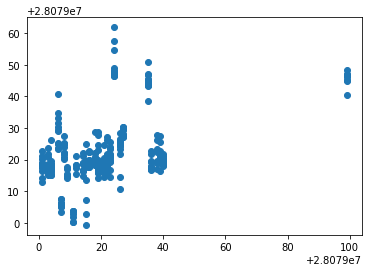

In [302]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [303]:
# Score

print(lr.score(x_test,y_test))

0.21228752581205024


In [304]:
print(lr.score(x_train,y_train))

0.29689126322841664


In [305]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [306]:
#Ridge Score
rr.score(x_test,y_test)

0.21276912676713444

In [307]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [308]:
# Lasso Score
la.score(x_test,y_test)

0.13931945852950245

In [309]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [310]:
print(en.coef_)

[-0.22753761  0.34730161 -1.13687725  0.90299172  1.04475587  0.03608186
 -0.01319137 -3.80936812  0.54485343]


In [311]:
print(en.intercept_)

28079047.565448366


In [312]:
print(en.predict(x_test))

[28079018.4173279  28079019.69801739 28079015.74950942 28079021.10270947
 28079020.89241197 28079017.24394982 28079017.02545949 28079023.94063639
 28079020.90123765 28079019.28951361 28079017.84294725 28079044.64219013
 28079017.18008417 28079025.95512908 28079043.89887647 28079021.05506713
 28079041.77763259 28079038.52551159 28079025.45488511 28079017.88826478
 28079045.65769034 28079017.89713719 28079022.07147013 28079019.76218147
 28079017.11676402 28079018.92234037 28079020.63890225 28079024.18103381
 28079044.84041591 28079018.21730503 28079020.36817281 28079046.6285166
 28079025.00482561 28079038.72325065 28079041.19234164 28079021.96582855
 28079059.33193225 28079033.00670632 28079019.12952454 28079056.19156762
 28079022.02607294 28079017.1944269  28079025.21305093 28079018.28143432
 28079017.18410877 28079018.60037596 28079016.06843515 28079016.98074358
 28079017.99965885 28079018.02797627 28079017.77632426 28079009.37048515
 28079023.14195903 28079044.95932214 28079025.126965

In [313]:
print(en.score(x_test,y_test))

0.1873041550555712


In [314]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [316]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [319]:
observation=[[12,45,81,94,78,15,39,64,5]]
prediction=logr.predict(observation)

In [320]:
print(prediction)

[28079009]


In [321]:
logr.classes_

array([28079001, 28079003, 28079004, 28079006, 28079007, 28079008,
       28079009, 28079011, 28079012, 28079014, 28079015, 28079016,
       28079018, 28079019, 28079021, 28079022, 28079023, 28079024,
       28079026, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079099], dtype=int64)

In [322]:
logr.predict_proba(observation)[0][0]

7.256660154115237e-109

In [323]:
#Random Forest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [324]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[12,51,32,42,65]}

In [325]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [12, 51, 32, 42, 65]},
             scoring='accuracy')

In [326]:
grid_search.best_score_

0.5785714285714285

In [327]:
rfc_best=grid_search.best_estimator_

[Text(1966.9499999999998, 1494.8999999999999, 'X[4] <= 5.55\ngini = 0.96\nsamples = 445\nvalue = [25, 28, 20, 33, 30, 23, 31, 27, 34, 26, 25, 25\n24, 28, 26, 30, 21, 17, 33, 25, 15, 36, 27, 29\n21, 41]'),
 Text(781.1999999999999, 1223.1, 'X[8] <= 4.665\ngini = 0.902\nsamples = 190\nvalue = [0, 0, 0, 33, 30, 23, 0, 27, 0, 0, 25, 0, 0\n0, 0, 0, 21, 17, 33, 25, 15, 0, 0, 0, 0, 41]'),
 Text(334.79999999999995, 951.3, 'X[1] <= 5.89\ngini = 0.638\nsamples = 42\nvalue = [0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0\n0, 0, 0, 13, 26, 0, 0, 0, 0, 0, 0, 0]'),
 Text(223.2, 679.4999999999999, 'X[4] <= 0.23\ngini = 0.491\nsamples = 25\nvalue = [0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0\n0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(111.6, 407.6999999999998, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(334.79999999999995, 407.6999999999998, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0\n0, 0, 

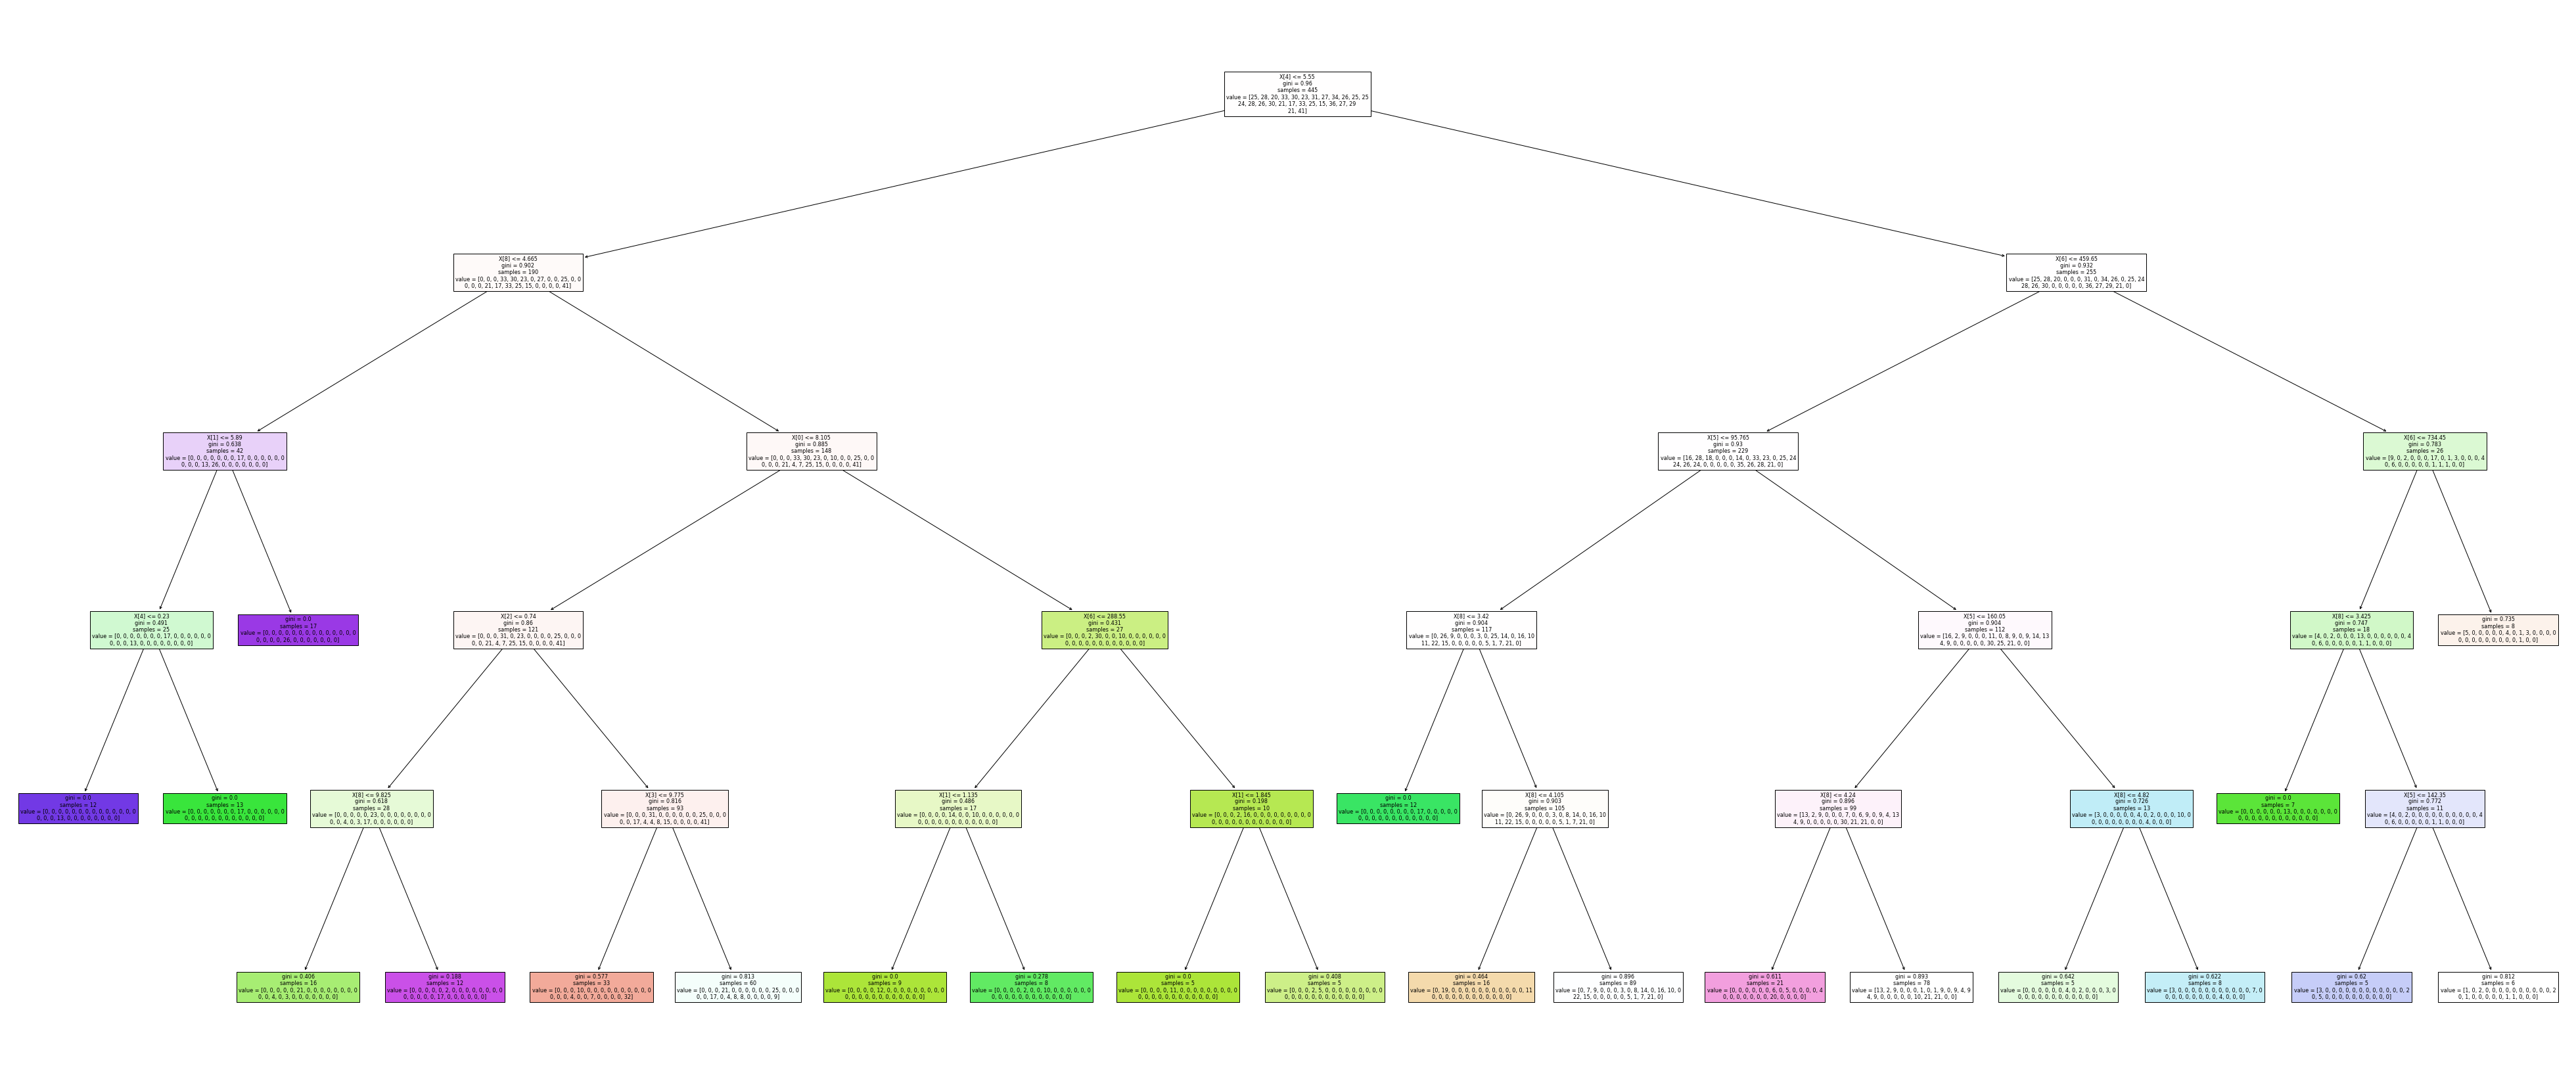

In [328]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion:RandomForest has Highest accuracy.RandomForest Score=0.5785714285714285

# DataSet 2007

In [329]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2007.csv")
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2007-12-01 01:00:00,NaN,2.86,NaN,NaN,NaN,282.200012,1054.000000,NaN,4.030000,156.199997,97.43,NaN,64.519997,NaN,NaN,28079001
1,2007-12-01 01:00:00,NaN,1.82,NaN,NaN,NaN,86.419998,354.600006,NaN,3.260000,80.809998,NaN,NaN,35.419998,NaN,NaN,28079003
2,2007-12-01 01:00:00,NaN,1.47,NaN,NaN,NaN,94.639999,319.000000,NaN,5.310000,53.099998,NaN,NaN,19.080000,NaN,NaN,28079004
3,2007-12-01 01:00:00,NaN,1.64,NaN,NaN,NaN,127.900002,476.700012,NaN,4.500000,105.300003,NaN,NaN,17.670000,NaN,NaN,28079039
4,2007-12-01 01:00:00,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,15.90,3.56,40.230000,1.94,21.200001,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225115,2007-03-01 00:00:00,0.30,0.45,1.00,0.30,0.26,8.690000,11.690000,1.00,42.209999,6.760000,5.14,1.00,7.420000,1.44,0.510000,28079024
225116,2007-03-01 00:00:00,NaN,0.16,NaN,NaN,NaN,46.820000,51.480000,NaN,22.150000,5.700000,NaN,NaN,7.130000,NaN,NaN,28079025
225117,2007-03-01 00:00:00,0.24,NaN,0.20,NaN,0.09,51.259998,66.809998,NaN,18.540001,13.010000,6.95,NaN,8.740000,1.30,0.490000,28079026
225118,2007-03-01 00:00:00,0.11,NaN,1.00,NaN,0.05,24.240000,36.930000,NaN,NaN,6.610000,NaN,NaN,9.890000,1.29,0.680000,28079027


In [330]:
a=a.head(100000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2007-12-01 01:00:00,NaN,2.86,NaN,NaN,NaN,282.200012,1054.000000,NaN,4.030000,156.199997,97.43,NaN,64.519997,NaN,NaN,28079001
1,2007-12-01 01:00:00,NaN,1.82,NaN,NaN,NaN,86.419998,354.600006,NaN,3.260000,80.809998,NaN,NaN,35.419998,NaN,NaN,28079003
2,2007-12-01 01:00:00,NaN,1.47,NaN,NaN,NaN,94.639999,319.000000,NaN,5.310000,53.099998,NaN,NaN,19.080000,NaN,NaN,28079004
3,2007-12-01 01:00:00,NaN,1.64,NaN,NaN,NaN,127.900002,476.700012,NaN,4.500000,105.300003,NaN,NaN,17.670000,NaN,NaN,28079039
4,2007-12-01 01:00:00,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,15.90,3.56,40.230000,1.94,21.200001,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2007-05-09 20:00:00,0.20,0.26,1.00,1.00,0.17,5.910000,6.000000,1.00,118.000000,19.940001,10.98,1.00,5.100000,1.31,0.930000,28079024
99996,2007-05-09 20:00:00,NaN,0.11,NaN,NaN,NaN,28.820000,32.709999,NaN,98.610001,24.280001,NaN,NaN,5.770000,NaN,NaN,28079025
99997,2007-05-09 20:00:00,0.20,NaN,1.00,NaN,0.05,72.699997,113.599998,NaN,83.889999,37.840000,12.93,NaN,7.910000,1.27,0.860000,28079026
99998,2007-05-09 20:00:00,0.20,NaN,1.00,NaN,0.06,33.020000,40.849998,NaN,NaN,41.119999,NaN,NaN,8.640000,1.23,1.060000,28079027


In [331]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     100000 non-null  object 
 1   BEN      30614 non-null   float64
 2   CO       91949 non-null   float64
 3   EBE      30620 non-null   float64
 4   MXY      11477 non-null   float64
 5   NMHC     38385 non-null   float64
 6   NO_2     99547 non-null   float64
 7   NOx      99539 non-null   float64
 8   OXY      11477 non-null   float64
 9   O_3      93996 non-null   float64
 10  PM10     98084 non-null   float64
 11  PM25     30422 non-null   float64
 12  PXY      11477 non-null   float64
 13  SO_2     99610 non-null   float64
 14  TCH      38401 non-null   float64
 15  TOL      30601 non-null   float64
 16  station  100000 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 13.0+ MB


In [332]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
4,2007-12-01 01:00:00,4.64,1.86,4.26,7.98,0.57,145.100006,573.900024,3.49,52.689999,106.500000,15.900000,3.56,40.230000,1.94,21.200001,28079006
21,2007-12-01 01:00:00,1.98,0.31,2.56,6.06,0.35,76.059998,208.899994,1.70,1.000000,37.799999,25.580000,1.78,11.310000,1.54,8.440000,28079024
25,2007-12-01 01:00:00,2.82,1.42,3.15,7.02,0.49,123.099998,402.399994,2.60,7.160000,70.809998,37.009998,2.67,25.670000,1.84,15.010000,28079099
30,2007-12-01 02:00:00,4.65,1.89,4.41,8.21,0.65,151.000000,622.700012,3.55,58.080002,117.099998,17.049999,3.57,36.459999,2.23,21.330000,28079006
47,2007-12-01 02:00:00,1.97,0.30,2.15,5.08,0.33,78.760002,189.800003,1.62,1.000000,34.740002,24.730000,1.59,10.500000,1.53,8.400000,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,2007-05-09 19:00:00,0.19,0.29,1.00,1.00,0.17,8.290000,8.620000,1.00,118.900002,22.219999,11.460000,1.00,5.260000,1.31,1.070000,28079024
99973,2007-05-09 19:00:00,0.66,0.44,1.60,1.29,0.21,70.790001,100.400002,0.89,79.410004,39.380001,20.450001,1.15,7.020000,1.38,3.780000,28079099
99978,2007-05-09 20:00:00,1.37,0.77,1.07,1.86,0.19,120.500000,195.800003,1.01,51.630001,38.500000,21.280001,1.23,7.930000,1.46,4.580000,28079006
99995,2007-05-09 20:00:00,0.20,0.26,1.00,1.00,0.17,5.910000,6.000000,1.00,118.000000,19.940001,10.980000,1.00,5.100000,1.31,0.930000,28079024


In [333]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11198 entries, 4 to 99999
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     11198 non-null  object 
 1   BEN      11198 non-null  float64
 2   CO       11198 non-null  float64
 3   EBE      11198 non-null  float64
 4   MXY      11198 non-null  float64
 5   NMHC     11198 non-null  float64
 6   NO_2     11198 non-null  float64
 7   NOx      11198 non-null  float64
 8   OXY      11198 non-null  float64
 9   O_3      11198 non-null  float64
 10  PM10     11198 non-null  float64
 11  PM25     11198 non-null  float64
 12  PXY      11198 non-null  float64
 13  SO_2     11198 non-null  float64
 14  TCH      11198 non-null  float64
 15  TOL      11198 non-null  float64
 16  station  11198 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 1.5+ MB


In [334]:
x=b.iloc[:,1:16]
y=b.iloc[:,-1]

In [335]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [336]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [337]:
print(lr.intercept_)

28079031.522236682


In [338]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-37.807385
CO,33.103861
EBE,3.887356
MXY,-2.053946
NMHC,-58.203239
NO_2,0.081828
NOx,-0.079048
OXY,0.992990
O_3,-0.055031
PM10,-0.569549


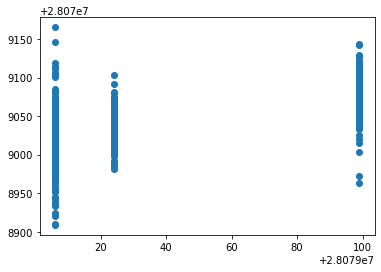

In [339]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [340]:
# Score

print(lr.score(x_test,y_test))

0.26725600135982785


In [341]:
print(lr.score(x_train,y_train))

0.26687133855233913


In [342]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [343]:
#Ridge Score
rr.score(x_test,y_test)

0.26734611613989057

In [344]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [345]:
# Lasso Score
la.score(x_test,y_test)

0.05605674874453481

In [346]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [347]:
print(en.coef_)

[-9.42466753  0.          0.         -0.38319451 -0.74689273  0.16163576
 -0.09701124 -0.          0.06138198 -0.58248488  1.54189264 -0.
  0.64635955 -0.          1.66794008]


In [348]:
print(en.intercept_)

28079033.481625326


In [349]:
print(en.predict(x_test))

[28079045.41949818 28079044.94154835 28079035.60083671 ...
 28079039.22559579 28079051.25000133 28079049.34545521]


In [350]:
print(en.score(x_test,y_test))

0.14254615018477668


In [351]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [352]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [354]:
observation=[[54,85,48,23,78,56,64,23,21,89,87,28,25,38,75]]
prediction=logr.predict(observation)

In [355]:
print(prediction)

[28079006]


In [356]:
logr.classes_

array([28079006, 28079024, 28079099], dtype=int64)

In [357]:
logr.predict_proba(observation)[0][0]

1.0

In [358]:
print(logr.score(x_test,y_test))

0.33779761904761907


In [359]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [361]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,8,10,62,51],
           'n_estimators':[12,51,54,14,65]}

In [362]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 8, 10, 62, 51],
                         'n_estimators': [12, 51, 54, 14, 65]},
             scoring='accuracy')

In [363]:
grid_search.best_score_

0.8195968359275325

In [364]:
rfc_best=grid_search.best_estimator_

[Text(1737.0432692307693, 1494.8999999999999, 'X[5] <= 28.65\ngini = 0.666\nsamples = 4948\nvalue = [2548, 2510, 2780]'),
 Text(769.9326923076923, 1223.1, 'X[4] <= 0.235\ngini = 0.352\nsamples = 814\nvalue = [89, 1055, 193]'),
 Text(413.13461538461536, 951.3, 'X[5] <= 17.77\ngini = 0.52\nsamples = 414\nvalue = [61, 420, 190]'),
 Text(225.34615384615384, 679.4999999999999, 'X[2] <= 1.035\ngini = 0.152\nsamples = 193\nvalue = [8, 272, 16]'),
 Text(150.23076923076923, 407.6999999999998, 'X[10] <= 3.21\ngini = 0.115\nsamples = 184\nvalue = [7, 264, 10]'),
 Text(75.11538461538461, 135.89999999999986, 'gini = 0.516\nsamples = 22\nvalue = [7, 26, 7]'),
 Text(225.34615384615384, 135.89999999999986, 'gini = 0.025\nsamples = 162\nvalue = [0, 238, 3]'),
 Text(300.46153846153845, 407.6999999999998, 'gini = 0.551\nsamples = 9\nvalue = [1, 8, 6]'),
 Text(600.9230769230769, 679.4999999999999, 'X[13] <= 1.355\ngini = 0.609\nsamples = 221\nvalue = [53, 148, 174]'),
 Text(450.6923076923077, 407.69999999

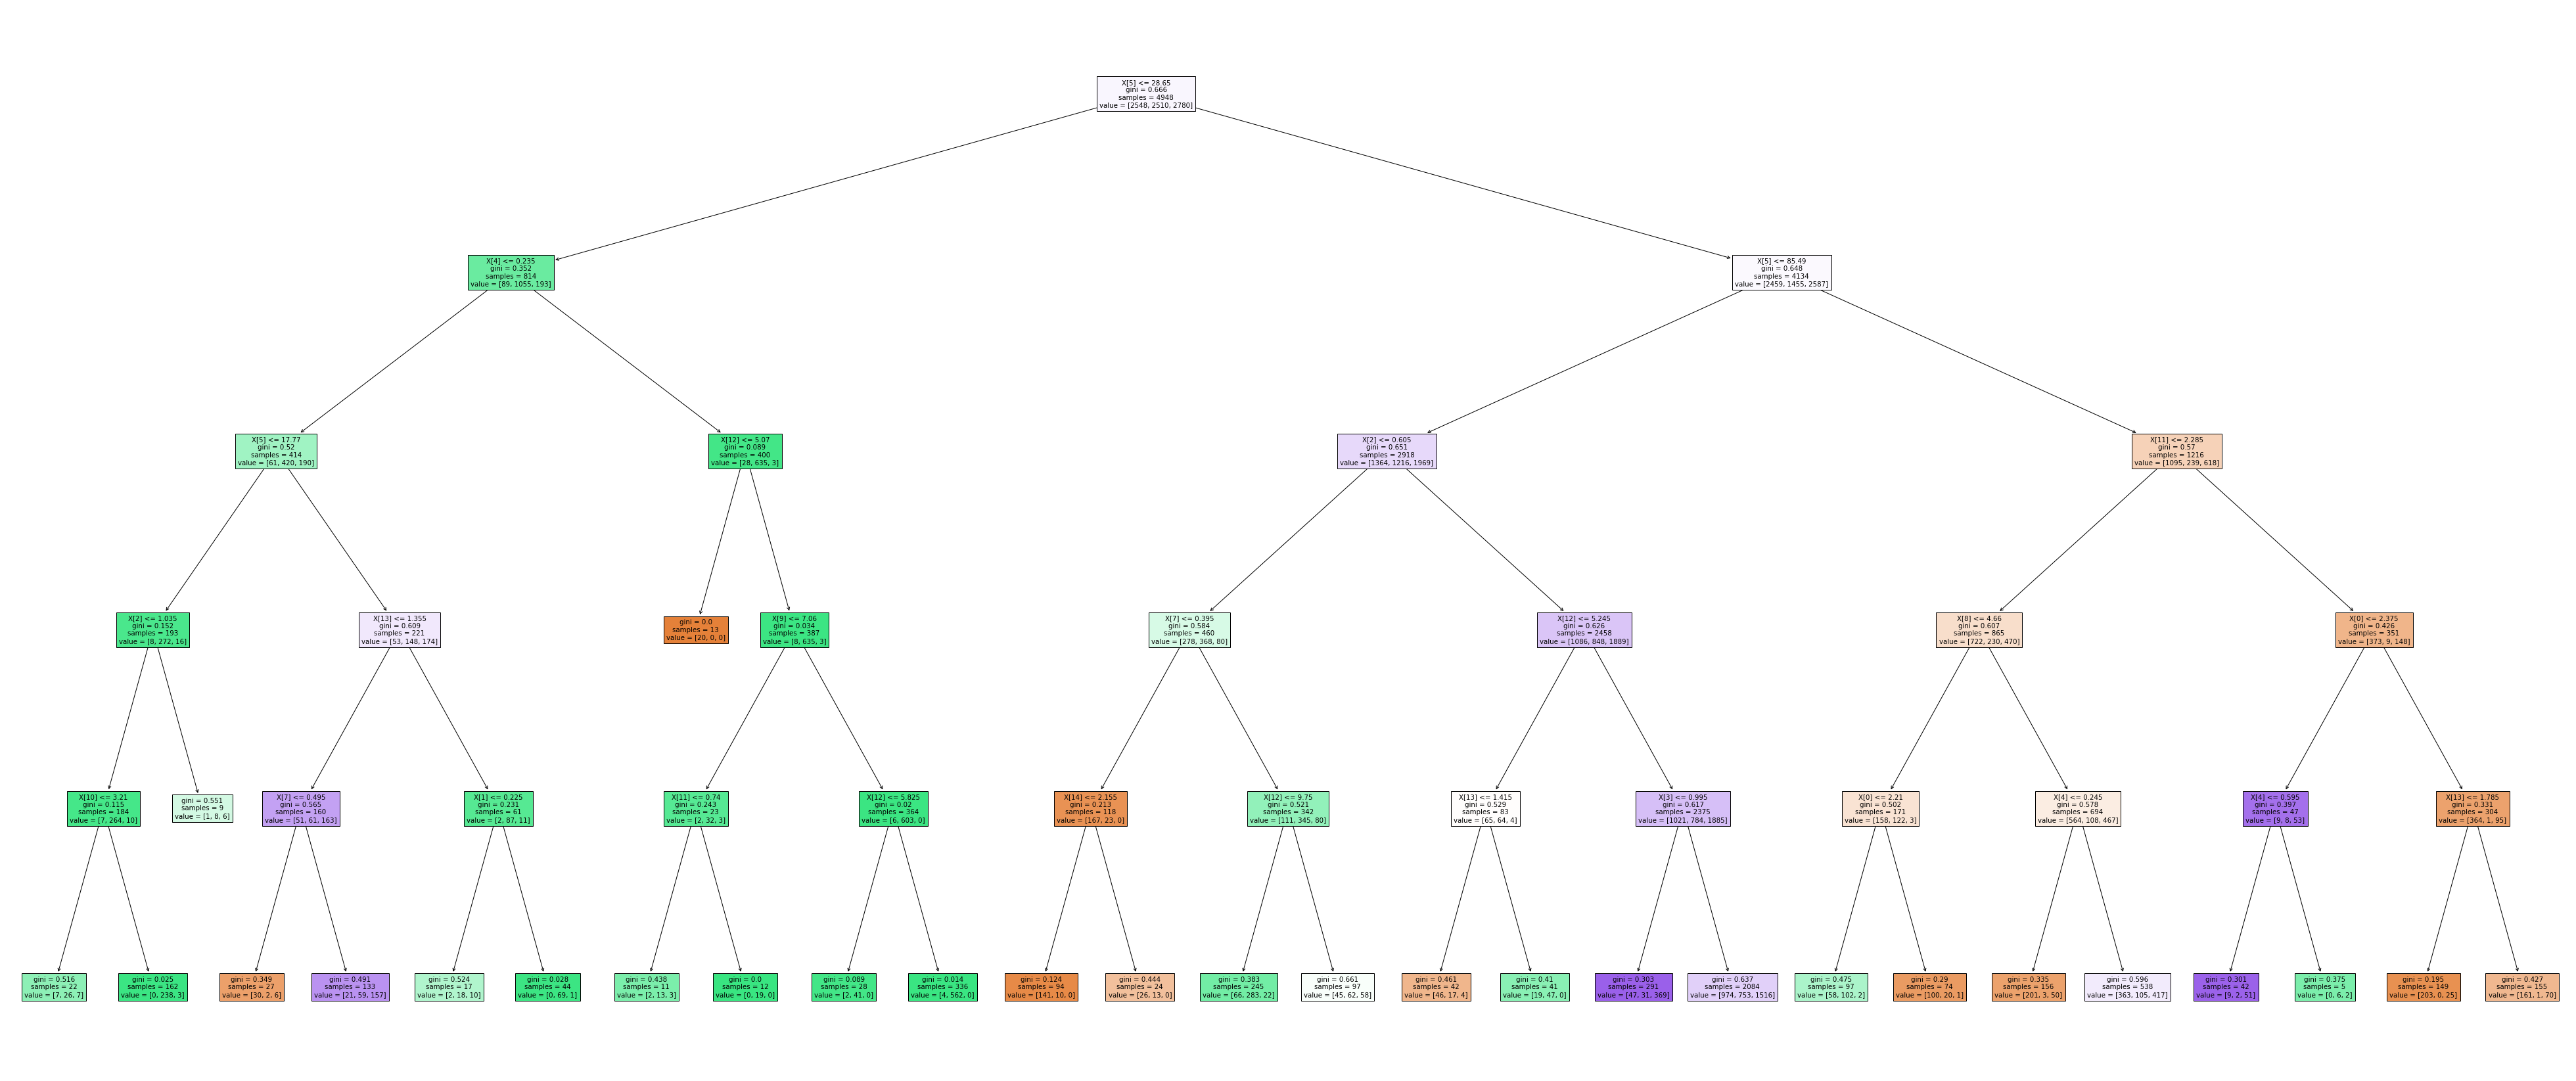

In [365]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

As per the score,RandomForest has Highest accuracy.Random Score=0.8195968359275325

# DataSet 2008

In [366]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2008.csv")
a=a.head(10000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,NaN,83.089996,120.699997,NaN,16.990000,16.889999,10.40,NaN,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,NaN,94.820000,130.399994,NaN,17.469999,19.040001,NaN,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,NaN,75.919998,104.599998,NaN,13.470000,20.270000,NaN,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,NaN,61.029999,66.559998,NaN,23.110001,10.850000,NaN,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.70,3.01,0.30,105.199997,214.899994,1.61,12.120000,37.160000,21.90,1.43,10.92,1.53,6.67,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2008-06-17 02:00:00,NaN,0.07,NaN,NaN,0.15,27.129999,33.869999,NaN,34.400002,10.090000,NaN,NaN,6.54,1.26,NaN,28079011
9996,2008-06-17 02:00:00,NaN,0.29,NaN,NaN,NaN,30.219999,38.060001,NaN,24.450001,18.920000,NaN,NaN,4.60,NaN,NaN,28079012
9997,2008-06-17 02:00:00,NaN,0.09,NaN,NaN,NaN,21.540001,30.370001,NaN,33.630001,16.080000,NaN,NaN,6.94,NaN,NaN,28079040
9998,2008-06-17 02:00:00,NaN,0.18,NaN,NaN,NaN,24.080000,36.040001,NaN,39.279999,7.190000,NaN,NaN,6.43,NaN,NaN,28079014


In [367]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     10000 non-null  object 
 1   BEN      3071 non-null   float64
 2   CO       9140 non-null   float64
 3   EBE      3070 non-null   float64
 4   MXY      1156 non-null   float64
 5   NMHC     3840 non-null   float64
 6   NO_2     9887 non-null   float64
 7   NOx      9887 non-null   float64
 8   OXY      1156 non-null   float64
 9   O_3      9530 non-null   float64
 10  PM10     9529 non-null   float64
 11  PM25     3076 non-null   float64
 12  PXY      1156 non-null   float64
 13  SO_2     9894 non-null   float64
 14  TCH      3840 non-null   float64
 15  TOL      3064 non-null   float64
 16  station  10000 non-null  int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 1.3+ MB


In [368]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
4,2008-06-01 01:00:00,1.68,0.80,1.70,3.01,0.30,105.199997,214.899994,1.61,12.120000,37.160000,21.90,1.43,10.92,1.53,6.67,28079006
21,2008-06-01 01:00:00,0.32,0.37,1.00,0.39,0.33,21.580000,22.180000,1.00,35.770000,7.900000,6.14,1.00,5.39,1.41,0.94,28079024
25,2008-06-01 01:00:00,0.73,0.39,1.04,1.70,0.18,64.839996,86.709999,1.31,23.379999,14.760000,9.84,1.22,6.82,1.37,2.82,28079099
30,2008-06-01 02:00:00,1.95,0.51,1.98,3.77,0.24,79.750000,143.399994,2.03,18.090000,31.139999,18.41,1.81,8.97,1.46,8.57,28079006
47,2008-06-01 02:00:00,0.36,0.39,0.39,0.50,0.34,26.790001,27.389999,1.00,33.029999,7.620000,6.25,0.38,5.59,1.42,1.18,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,2008-06-17 00:00:00,0.42,0.24,0.82,0.95,0.13,35.650002,46.689999,1.00,31.360001,11.530000,7.80,0.76,6.59,1.38,2.08,28079099
9964,2008-06-17 01:00:00,0.20,0.27,1.00,1.00,0.09,42.529999,64.169998,1.00,32.270000,17.830000,9.12,1.00,7.06,1.39,1.00,28079006
9981,2008-06-17 01:00:00,0.20,0.28,1.00,0.67,0.09,9.670000,10.980000,1.00,40.360001,5.460000,4.31,0.92,6.18,1.29,0.48,28079024
9985,2008-06-17 01:00:00,0.41,0.22,0.71,0.84,0.13,32.959999,41.150002,1.00,30.110001,12.910000,9.90,0.96,6.52,1.39,1.94,28079099


In [369]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 4 to 9990
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     1145 non-null   object 
 1   BEN      1145 non-null   float64
 2   CO       1145 non-null   float64
 3   EBE      1145 non-null   float64
 4   MXY      1145 non-null   float64
 5   NMHC     1145 non-null   float64
 6   NO_2     1145 non-null   float64
 7   NOx      1145 non-null   float64
 8   OXY      1145 non-null   float64
 9   O_3      1145 non-null   float64
 10  PM10     1145 non-null   float64
 11  PM25     1145 non-null   float64
 12  PXY      1145 non-null   float64
 13  SO_2     1145 non-null   float64
 14  TCH      1145 non-null   float64
 15  TOL      1145 non-null   float64
 16  station  1145 non-null   int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 161.0+ KB


In [370]:
x=b.iloc[:,1:7]
y=b.iloc[:,-1]

In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [372]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [373]:
print(lr.intercept_)

28079068.0739363


In [374]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-24.392344
CO,-104.620850
EBE,2.034060
MXY,5.619841
NMHC,-79.827764
NO_2,0.829351


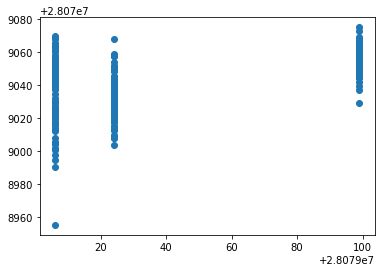

In [375]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [376]:
# Score

print(lr.score(x_test,y_test))

0.273076632562266


In [377]:
print(lr.score(x_train,y_train))

0.21296008511225006


In [378]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [379]:
#Ridge Score
rr.score(x_test,y_test)

0.21070093640077325

In [380]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [381]:
# Lasso Score
la.score(x_test,y_test)

0.00179961467215084

In [382]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [383]:
print(en.coef_)

[-4.67853541 -2.62003962 -2.23516314 -0.5454146  -0.28712547  0.12128698]


In [384]:
print(en.intercept_)

28079045.995925557


In [385]:
print(en.predict(x_test))

[28079043.25449254 28079044.51235956 28079040.81607949 28079043.47845913
 28079028.89775055 28079045.34287264 28079044.7570797  28079042.81479698
 28079045.54319067 28079043.70284332 28079044.269665   28079043.65184073
 28079044.08466397 28079042.7143904  28079044.77238382 28079043.78519542
 28079044.33626964 28079042.96928637 28079044.7721495  28079043.34905914
 28079047.31483868 28079028.53310716 28079044.48188853 28079044.82636682
 28079041.91262411 28079045.45384607 28079040.70319711 28079045.66846021
 28079041.99831321 28079041.40580629 28079044.13606409 28079044.0358822
 28079042.93596331 28079045.22055961 28079040.76631771 28079044.71794759
 28079043.27173195 28079041.84765431 28079046.46929707 28079040.5852607
 28079041.55935261 28079042.83216777 28079037.56700928 28079044.72092368
 28079042.60990479 28079043.90352872 28079044.49874678 28079041.01057488
 28079041.67280966 28079044.50893651 28079048.1375157  28079044.65424636
 28079044.72758175 28079042.33610516 28079043.1585455

In [386]:
print(en.score(x_test,y_test))

0.03745003073099018


In [387]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [388]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [389]:
observation=[[12,45,48,23,78,90]]
prediction=logr.predict(observation)

In [390]:
print(prediction)

[28079006]


In [391]:
logr.classes_

array([28079006, 28079024, 28079099], dtype=int64)

In [393]:
logr.predict_proba(observation)[0][0]

0.9999999999993192

In [394]:
print(logr.score(x_test,y_test))

0.36046511627906974


In [395]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [397]:
parameters={'max_depth':[1,2,18,36,54],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[12,51,32,42,56]}

In [398]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 18, 36, 54],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [12, 51, 32, 42, 56]},
             scoring='accuracy')

In [399]:
grid_search.best_score_

0.8801371571072318

In [400]:
rfc_best=grid_search.best_estimator_

[Text(1667.3897058823532, 1549.26, 'X[5] <= 29.5\ngini = 0.665\nsamples = 509\nvalue = [248, 292, 261]'),
 Text(663.7647058823529, 1386.18, 'X[2] <= 0.98\ngini = 0.331\nsamples = 216\nvalue = [21, 280, 47]'),
 Text(408.47058823529414, 1223.1, 'X[1] <= 0.25\ngini = 0.522\nsamples = 109\nvalue = [18, 109, 46]'),
 Text(204.23529411764707, 1060.02, 'X[0] <= 0.285\ngini = 0.465\nsamples = 48\nvalue = [17, 4, 45]'),
 Text(102.11764705882354, 896.94, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 17]'),
 Text(306.3529411764706, 896.94, 'X[2] <= 0.56\ngini = 0.546\nsamples = 37\nvalue = [17, 4, 28]'),
 Text(204.23529411764707, 733.86, 'gini = 0.426\nsamples = 9\nvalue = [9, 4, 0]'),
 Text(408.47058823529414, 733.86, 'X[4] <= 0.16\ngini = 0.346\nsamples = 28\nvalue = [8, 0, 28]'),
 Text(306.3529411764706, 570.78, 'X[5] <= 20.64\ngini = 0.124\nsamples = 23\nvalue = [2, 0, 28]'),
 Text(204.23529411764707, 407.70000000000005, 'gini = 0.408\nsamples = 5\nvalue = [2, 0, 5]'),
 Text(408.47058823529414, 40

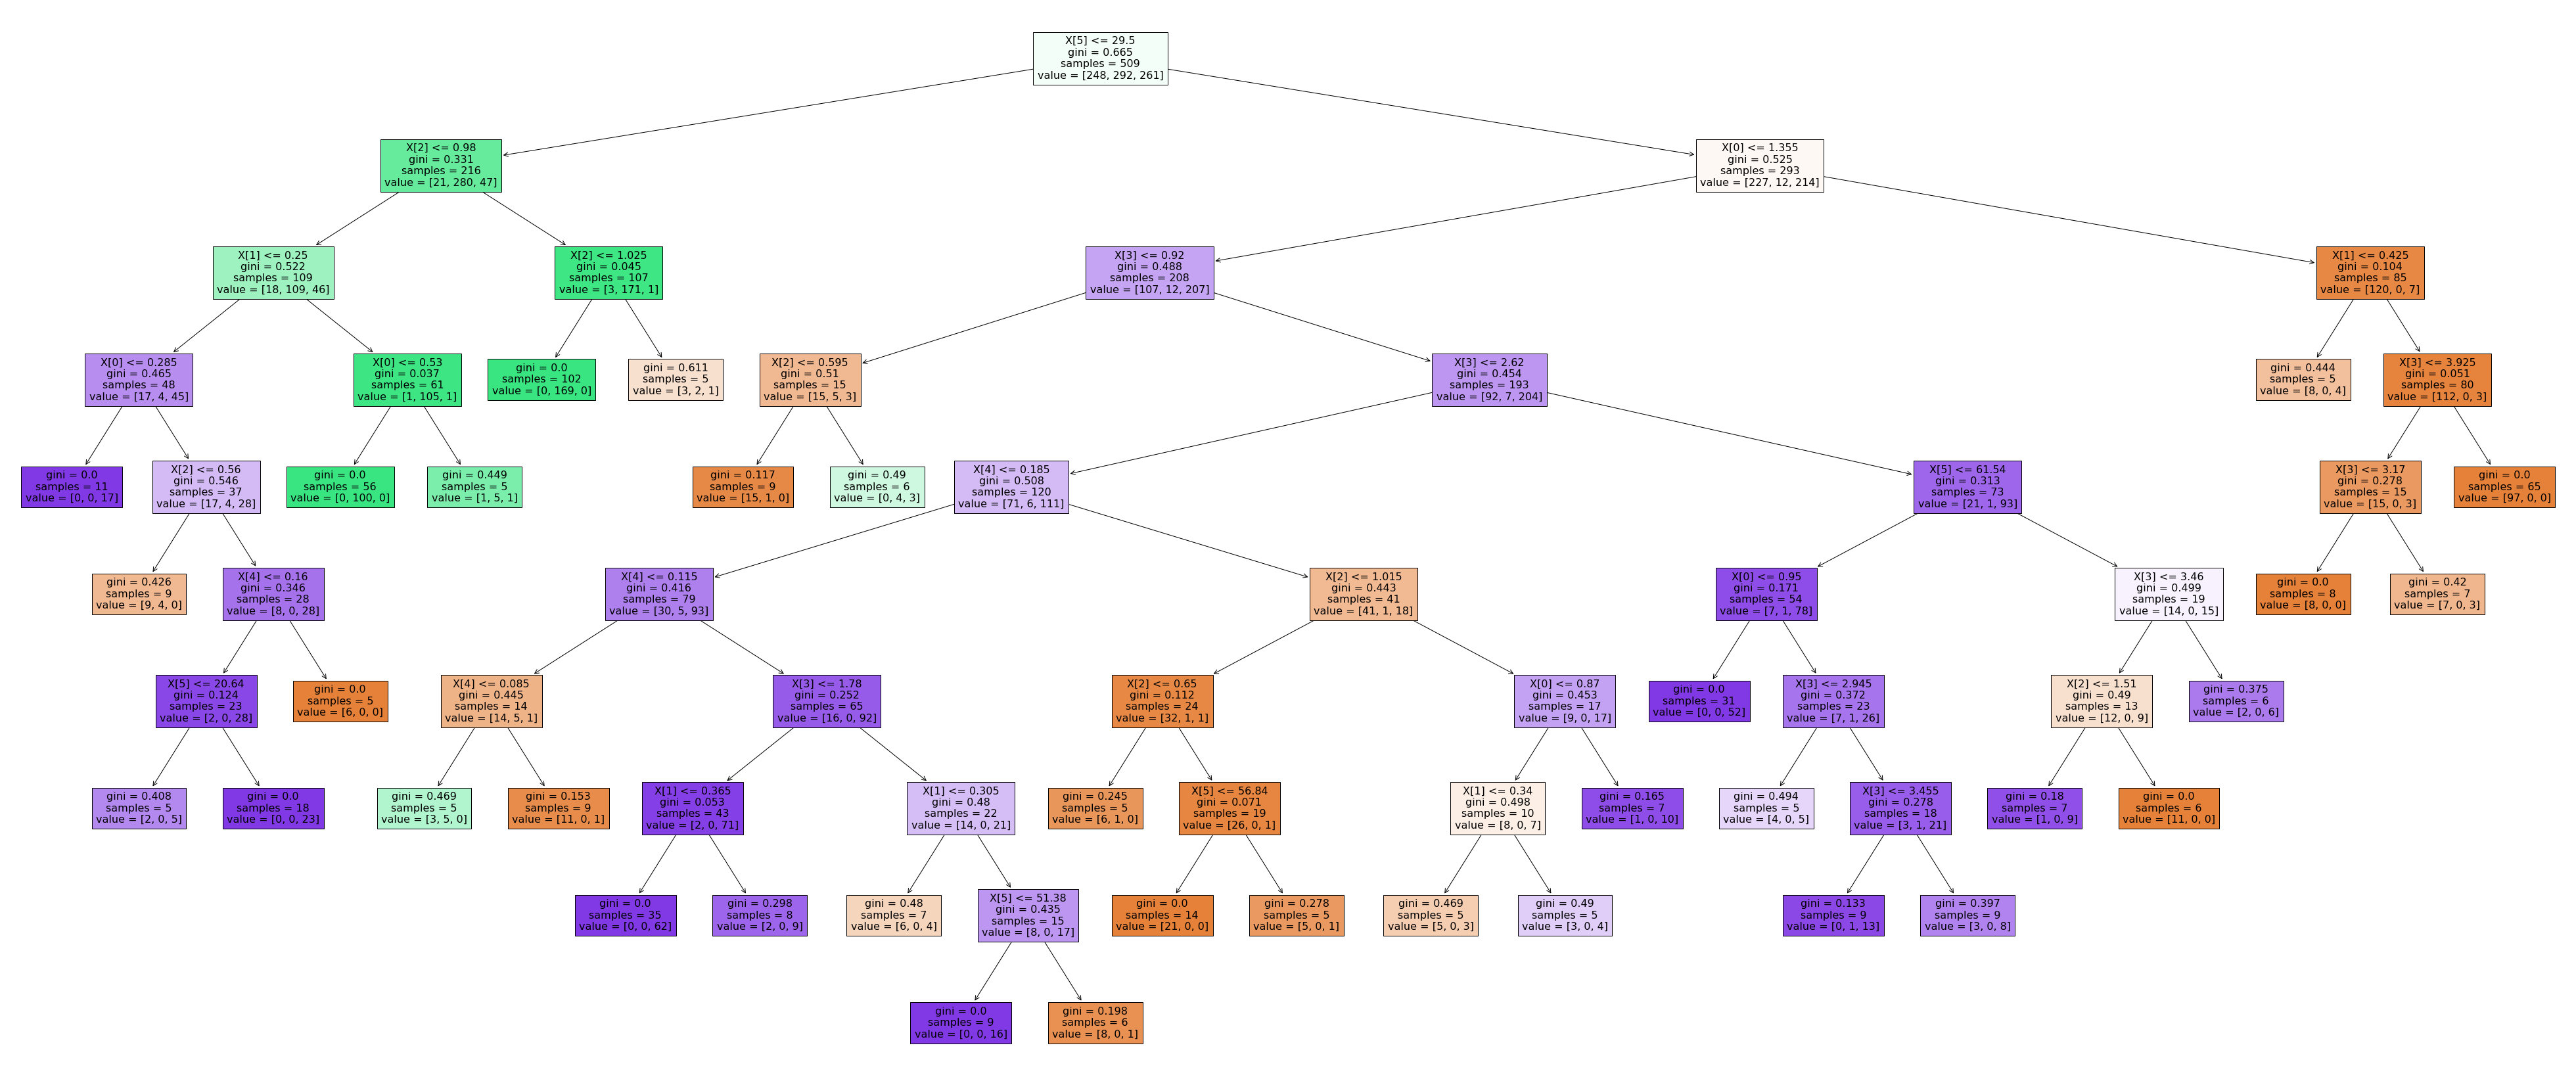

In [401]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.8801371571072318

# DataSet 2009

In [402]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2009.csv")
a=a.head(50000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2009-10-01 01:00:00,NaN,0.27,NaN,NaN,NaN,39.889999,48.150002,NaN,50.680000,18.260000,NaN,NaN,5.55,NaN,NaN,28079003
1,2009-10-01 01:00:00,NaN,0.22,NaN,NaN,NaN,21.230000,24.260000,NaN,55.880001,10.580000,NaN,NaN,8.84,NaN,NaN,28079004
2,2009-10-01 01:00:00,NaN,0.18,NaN,NaN,NaN,31.230000,34.880001,NaN,49.060001,25.190001,NaN,NaN,6.98,NaN,NaN,28079039
3,2009-10-01 01:00:00,0.95,0.33,1.43,2.68,0.25,55.180000,81.360001,1.57,36.669998,26.530001,6.82,1.30,8.88,1.38,4.62,28079006
4,2009-10-01 01:00:00,NaN,0.41,NaN,NaN,0.12,61.349998,76.260002,NaN,38.090000,23.760000,NaN,NaN,7.82,1.41,NaN,28079007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2009-09-22 09:00:00,0.49,0.45,0.43,NaN,0.08,80.260002,159.300003,NaN,16.520000,NaN,NaN,NaN,7.94,1.45,1.96,28079023
49996,2009-09-22 09:00:00,0.43,0.65,0.52,1.00,0.75,49.860001,57.209999,1.00,24.760000,13.150000,7.53,0.73,5.42,1.49,0.78,28079024
49997,2009-09-22 09:00:00,NaN,0.57,NaN,NaN,NaN,132.899994,291.299988,NaN,9.780000,25.920000,NaN,NaN,11.18,NaN,NaN,28079025
49998,2009-09-22 09:00:00,0.28,NaN,0.47,NaN,0.26,80.089996,111.500000,NaN,10.670000,8.490000,9.56,NaN,8.05,1.52,0.38,28079026


In [403]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
3,2009-10-01 01:00:00,0.95,0.33,1.43,2.68,0.25,55.180000,81.360001,1.57,36.669998,26.530001,6.82,1.30,8.88,1.38,4.62,28079006
20,2009-10-01 01:00:00,0.38,0.32,0.32,0.89,0.01,17.969999,19.240000,1.00,65.870003,10.520000,7.01,0.84,6.35,1.25,1.10,28079024
24,2009-10-01 01:00:00,0.55,0.24,0.65,1.79,0.18,36.619999,43.919998,1.28,48.070000,19.150000,9.33,1.07,6.94,1.39,3.64,28079099
28,2009-10-01 02:00:00,0.65,0.21,1.20,2.04,0.18,37.169998,48.869999,1.21,26.950001,32.200001,6.94,1.04,8.31,1.36,3.82,28079006
45,2009-10-01 02:00:00,0.38,0.30,0.50,1.15,0.00,17.889999,19.299999,1.00,60.009998,12.260000,8.46,0.88,6.24,1.22,1.94,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49954,2009-09-22 08:00:00,0.53,0.38,0.44,0.61,0.10,79.580002,125.699997,0.43,20.480000,20.230000,8.62,0.29,9.54,1.38,1.87,28079006
49971,2009-09-22 08:00:00,0.44,0.62,0.57,0.91,0.73,24.780001,26.600000,1.00,51.470001,3.990000,4.90,0.79,5.56,1.45,0.71,28079024
49975,2009-09-22 08:00:00,0.36,0.36,0.78,0.76,0.19,65.379997,97.949997,0.71,26.180000,11.300000,8.04,0.54,7.41,1.43,1.08,28079099
49979,2009-09-22 09:00:00,1.05,0.66,0.79,1.31,0.16,103.800003,182.199997,0.73,9.730000,19.030001,9.82,0.60,11.04,1.44,3.62,28079006


In [404]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5847 entries, 3 to 49996
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     5847 non-null   object 
 1   BEN      5847 non-null   float64
 2   CO       5847 non-null   float64
 3   EBE      5847 non-null   float64
 4   MXY      5847 non-null   float64
 5   NMHC     5847 non-null   float64
 6   NO_2     5847 non-null   float64
 7   NOx      5847 non-null   float64
 8   OXY      5847 non-null   float64
 9   O_3      5847 non-null   float64
 10  PM10     5847 non-null   float64
 11  PM25     5847 non-null   float64
 12  PXY      5847 non-null   float64
 13  SO_2     5847 non-null   float64
 14  TCH      5847 non-null   float64
 15  TOL      5847 non-null   float64
 16  station  5847 non-null   int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 822.2+ KB


In [425]:
x=b.iloc[:,1:8]
y=b.iloc[:,-1]

In [426]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [427]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [428]:
print(lr.intercept_)

28079069.95590732


In [429]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-31.216582
CO,-36.199766
EBE,-20.477364
MXY,16.138946
NMHC,7.262429
NO_2,-0.546348
NOx,0.395865


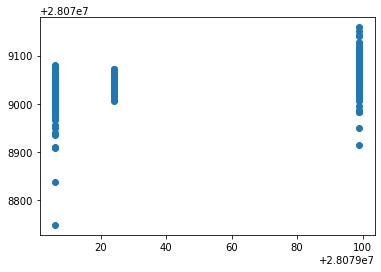

In [430]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [431]:
# Score

print(lr.score(x_test,y_test))

0.2531789196040445


In [432]:
print(lr.score(x_train,y_train))

0.2692624360381868


In [433]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [434]:
#Ridge Score
rr.score(x_test,y_test)

0.25302332992136933

In [435]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [436]:
# Lasso Score
la.score(x_test,y_test)

0.023419017461625002

In [437]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [438]:
print(en.coef_)

[-8.88033795 -1.41587623 -4.46613869  4.0644397  -0.07044816 -0.26685827
  0.08408006]


In [439]:
print(en.intercept_)

28079056.860362727


In [440]:
print(en.predict(x_test))

[28079054.69924281 28079047.48342941 28079049.62051748 ...
 28079052.55858706 28079048.93346014 28079050.59661785]


In [441]:
print(en.score(x_test,y_test))

0.12706104744060698


In [442]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [443]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [445]:
observation=[[12,23,78,21,56,23,81]]
prediction=logr.predict(observation)

In [446]:
print(prediction)

[28079006]


In [447]:
logr.classes_

array([28079006, 28079024, 28079099], dtype=int64)

In [448]:
logr.predict_proba(observation)[0][0]

0.999999999939311

In [449]:
print(logr.score(x_test,y_test))

0.31851851851851853


In [450]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [451]:
parameters={'max_depth':[51,54,59,62,35],
           'min_samples_leaf':[21,23,25,27,29],
           'n_estimators':[78,53,47,49,65]}

In [452]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [51, 54, 59, 62, 35],
                         'min_samples_leaf': [21, 23, 25, 27, 29],
                         'n_estimators': [78, 53, 47, 49, 65]},
             scoring='accuracy')

In [453]:
grid_search.best_score_

0.9266862170087976

In [454]:
rfc_best=grid_search.best_estimator_

[Text(2130.8922230113635, 1568.076923076923, 'X[0] <= 1.065\ngini = 0.666\nsamples = 2581\nvalue = [1302, 1385, 1405]'),
 Text(871.7759232954545, 1442.6307692307691, 'X[6] <= 23.51\ngini = 0.617\nsamples = 1902\nvalue = [461, 1321, 1251]'),
 Text(221.93181818181816, 1317.1846153846154, 'X[4] <= 0.205\ngini = 0.136\nsamples = 438\nvalue = [3, 672, 50]'),
 Text(177.54545454545453, 1191.7384615384615, 'X[1] <= 0.115\ngini = 0.309\nsamples = 170\nvalue = [3, 229, 50]'),
 Text(88.77272727272727, 1066.2923076923075, 'X[3] <= 0.61\ngini = 0.021\nsamples = 55\nvalue = [0, 93, 1]'),
 Text(44.38636363636363, 940.8461538461538, 'gini = 0.0\nsamples = 34\nvalue = [0, 61, 0]'),
 Text(133.1590909090909, 940.8461538461538, 'gini = 0.059\nsamples = 21\nvalue = [0, 32, 1]'),
 Text(266.3181818181818, 1066.2923076923075, 'X[0] <= 0.355\ngini = 0.408\nsamples = 115\nvalue = [3, 136, 49]'),
 Text(221.93181818181816, 940.8461538461538, 'gini = 0.457\nsamples = 33\nvalue = [2, 16, 38]'),
 Text(310.7045454545

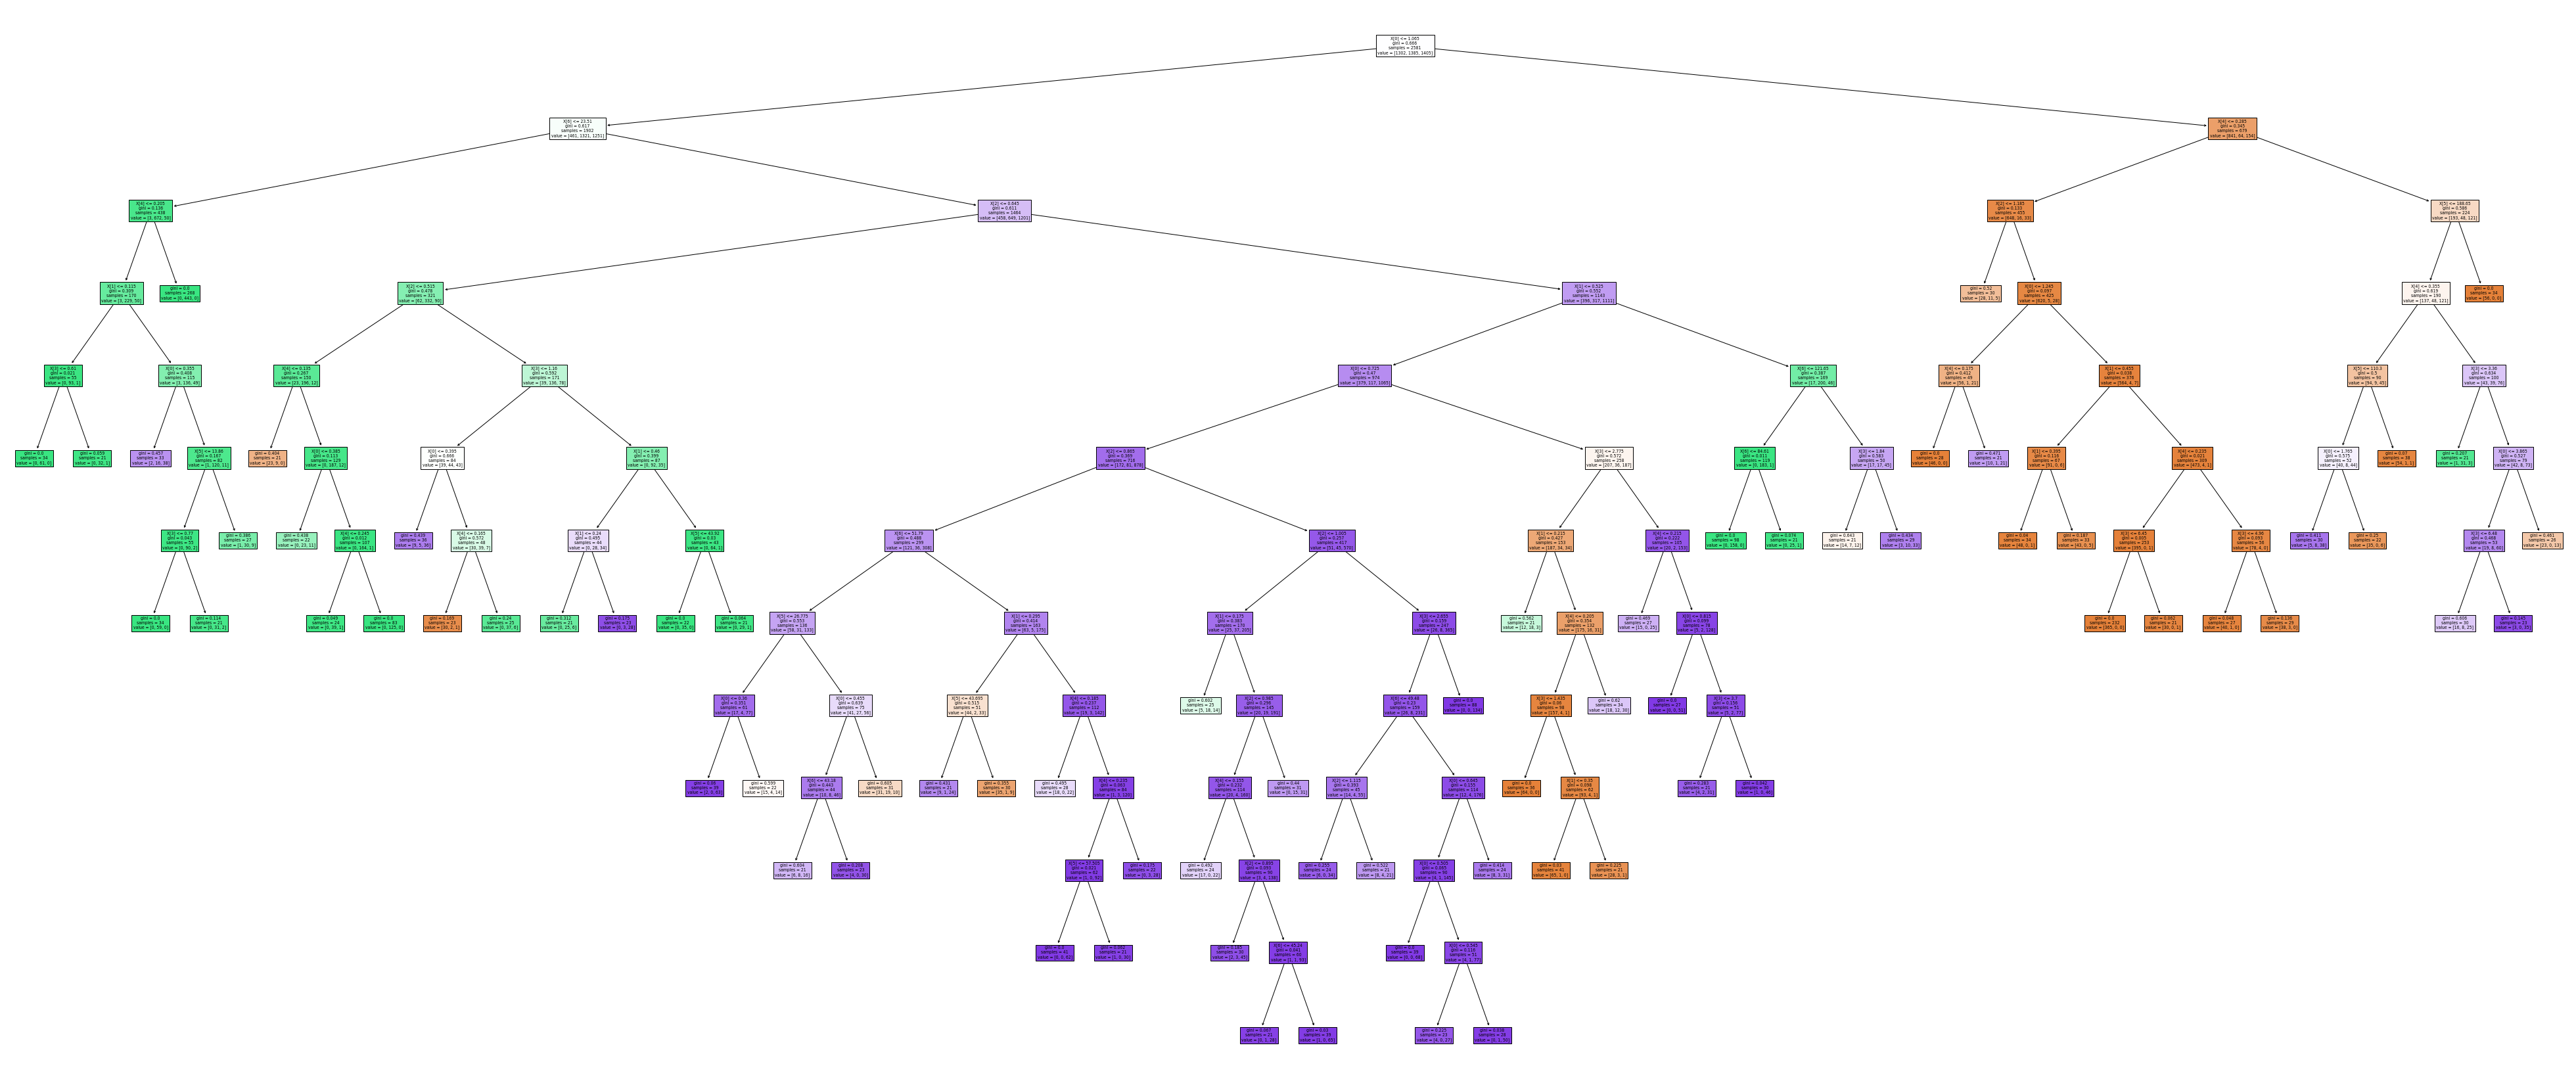

In [455]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.9266862170087976

# DataSet 2010

In [456]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2010.csv")
a=a.head(100000)
a

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
0,2010-03-01 01:00:00,NaN,0.29,NaN,NaN,NaN,25.090000,29.219999,NaN,68.930000,NaN,NaN,NaN,10.15,NaN,NaN,28079003
1,2010-03-01 01:00:00,NaN,0.27,NaN,NaN,NaN,24.879999,30.040001,NaN,NaN,NaN,NaN,NaN,12.24,NaN,NaN,28079004
2,2010-03-01 01:00:00,NaN,0.28,NaN,NaN,NaN,17.410000,20.540001,NaN,72.120003,NaN,NaN,NaN,NaN,NaN,NaN,28079039
3,2010-03-01 01:00:00,0.38,0.24,1.74,NaN,0.05,15.610000,21.080000,NaN,72.970001,19.41,7.870000,NaN,10.06,1.52,1.49,28079008
4,2010-03-01 01:00:00,0.79,NaN,1.32,NaN,NaN,21.430000,26.070000,NaN,NaN,24.67,22.030001,NaN,10.68,NaN,2.88,28079038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2010-04-25 13:00:00,0.42,0.24,0.87,1.0,0.27,20.320000,26.000000,0.79,103.000000,12.84,5.180000,0.64,12.24,1.35,1.45,28079024
99996,2010-04-25 13:00:00,NaN,NaN,NaN,NaN,0.05,21.740000,35.610001,NaN,81.610001,NaN,NaN,NaN,NaN,1.32,NaN,28079027
99997,2010-04-25 13:00:00,NaN,NaN,NaN,NaN,NaN,23.610001,30.190001,NaN,NaN,13.11,8.030000,NaN,NaN,NaN,NaN,28079047
99998,2010-04-25 13:00:00,NaN,NaN,NaN,NaN,NaN,11.380000,14.800000,NaN,92.349998,NaN,NaN,NaN,NaN,NaN,NaN,28079049


In [457]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
11,2010-03-01 01:00:00,0.78,0.18,0.84,0.73,0.28,10.420000,11.900000,1.00,90.309998,18.370001,11.30,0.81,9.40,1.55,1.99,28079024
23,2010-03-01 01:00:00,0.70,0.23,1.00,0.73,0.18,17.820000,22.290001,1.00,70.550003,23.639999,13.15,0.81,9.76,1.48,2.62,28079099
35,2010-03-01 02:00:00,0.58,0.17,0.84,0.73,0.28,3.500000,4.950000,1.00,68.849998,5.600000,5.25,0.81,8.56,1.54,0.84,28079024
47,2010-03-01 02:00:00,0.33,0.21,0.84,0.73,0.17,10.810000,14.900000,1.00,74.750000,7.890000,5.54,0.81,8.82,1.44,1.21,28079099
59,2010-03-01 03:00:00,0.38,0.16,0.64,1.00,0.26,2.750000,4.200000,1.00,93.629997,5.130000,4.90,0.79,8.56,1.54,0.49,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,2010-04-25 11:00:00,0.45,0.29,0.88,1.00,0.25,31.469999,44.400002,0.48,51.180000,17.910000,7.00,0.60,12.47,1.46,1.87,28079024
99959,2010-04-25 11:00:00,0.31,0.32,0.48,1.00,0.16,30.410000,43.360001,0.48,51.169998,20.420000,11.19,0.60,10.09,1.44,2.14,28079099
99971,2010-04-25 12:00:00,0.49,0.26,0.98,1.00,0.27,26.709999,34.840000,0.37,82.220001,16.670000,6.79,0.72,12.71,1.39,1.95,28079024
99983,2010-04-25 12:00:00,0.38,0.31,0.48,1.00,0.15,25.440001,35.189999,0.37,64.959999,16.350000,10.80,0.72,10.04,1.41,1.86,28079099


In [458]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 11 to 99995
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     5025 non-null   object 
 1   BEN      5025 non-null   float64
 2   CO       5025 non-null   float64
 3   EBE      5025 non-null   float64
 4   MXY      5025 non-null   float64
 5   NMHC     5025 non-null   float64
 6   NO_2     5025 non-null   float64
 7   NOx      5025 non-null   float64
 8   OXY      5025 non-null   float64
 9   O_3      5025 non-null   float64
 10  PM10     5025 non-null   float64
 11  PM25     5025 non-null   float64
 12  PXY      5025 non-null   float64
 13  SO_2     5025 non-null   float64
 14  TCH      5025 non-null   float64
 15  TOL      5025 non-null   float64
 16  station  5025 non-null   int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 706.6+ KB


In [459]:
x=b.iloc[:,1:9]
y=b.iloc[:,-1]

In [460]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [461]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [462]:
print(lr.intercept_)

28079024.235665835


In [463]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff


,Co-efficient
BEN,-27.197744
CO,154.015598
EBE,40.449137
MXY,-10.550442
NMHC,-76.571095
NO_2,0.143705
NOx,-0.317495
OXY,11.264215


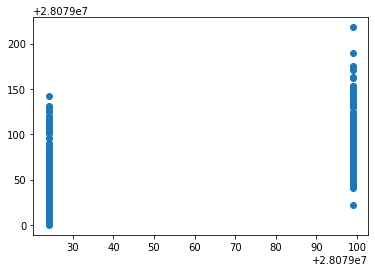

In [464]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [465]:
# Score

print(lr.score(x_test,y_test))

0.36491899807648887


In [466]:
print(lr.score(x_train,y_train))

0.40763179780141545


In [467]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [468]:
#Ridge Score
rr.score(x_test,y_test)

0.37206898348607753

In [469]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [470]:
# Lasso Score
la.score(x_test,y_test)

0.08611307625988662

In [471]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [472]:
print(en.coef_)

[ 0.5149399   0.52951461  8.9746094  -1.43515171 -1.03767562 -0.15720093
  0.25861891  0.        ]


In [473]:
print(en.intercept_)

28079047.07141018


In [474]:
print(en.predict(x_test))

[28079091.6630704  28079051.05754229 28079055.72267235 ...
 28079065.56148108 28079057.74130636 28079057.8801536 ]


In [475]:
print(en.score(x_test,y_test))

0.16571546760663525


In [476]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [477]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [479]:
observation=[[12,54,67,78,45,90,28,69]]
prediction=logr.predict(observation)

In [480]:
print(prediction)

[28079099]


In [481]:
logr.classes_

array([28079024, 28079099], dtype=int64)

In [482]:
logr.predict_proba(observation)[0][0]

0.0

In [483]:
print(logr.score(x_test,y_test))

0.47480106100795755


In [484]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [485]:
parameters={'max_depth':[1,98,3,78,53],
           'min_samples_leaf':[5,10,13,32,45],
           'n_estimators':[61,65,69,67,65]}

In [486]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 98, 3, 78, 53],
                         'min_samples_leaf': [5, 10, 13, 32, 45],
                         'n_estimators': [61, 65, 69, 67, 65]},
             scoring='accuracy')

In [487]:
grid_search.best_score_

0.9556438495085571

In [488]:
rfc_best=grid_search.best_estimator_

[Text(2172.5688202247193, 2613.4615384615386, 'X[1] <= 0.255\ngini = 0.5\nsamples = 2272\nvalue = [1755, 1762]'),
 Text(688.0955056179776, 2404.3846153846152, 'X[5] <= 10.485\ngini = 0.249\nsamples = 902\nvalue = [1225, 209]'),
 Text(133.75280898876406, 2195.3076923076924, 'X[6] <= 12.295\ngini = 0.058\nsamples = 288\nvalue = [452, 14]'),
 Text(66.87640449438203, 1986.2307692307693, 'X[3] <= 0.965\ngini = 0.018\nsamples = 272\nvalue = [436, 4]'),
 Text(33.438202247191015, 1777.1538461538462, 'gini = 0.0\nsamples = 55\nvalue = [83, 0]'),
 Text(100.31460674157304, 1777.1538461538462, 'X[5] <= 7.17\ngini = 0.022\nsamples = 217\nvalue = [353, 4]'),
 Text(66.87640449438203, 1568.076923076923, 'gini = 0.0\nsamples = 149\nvalue = [241, 0]'),
 Text(133.75280898876406, 1568.076923076923, 'X[1] <= 0.175\ngini = 0.067\nsamples = 68\nvalue = [112, 4]'),
 Text(66.87640449438203, 1359.0, 'X[2] <= 0.92\ngini = 0.147\nsamples = 16\nvalue = [23, 2]'),
 Text(33.438202247191015, 1149.923076923077, 'gini 

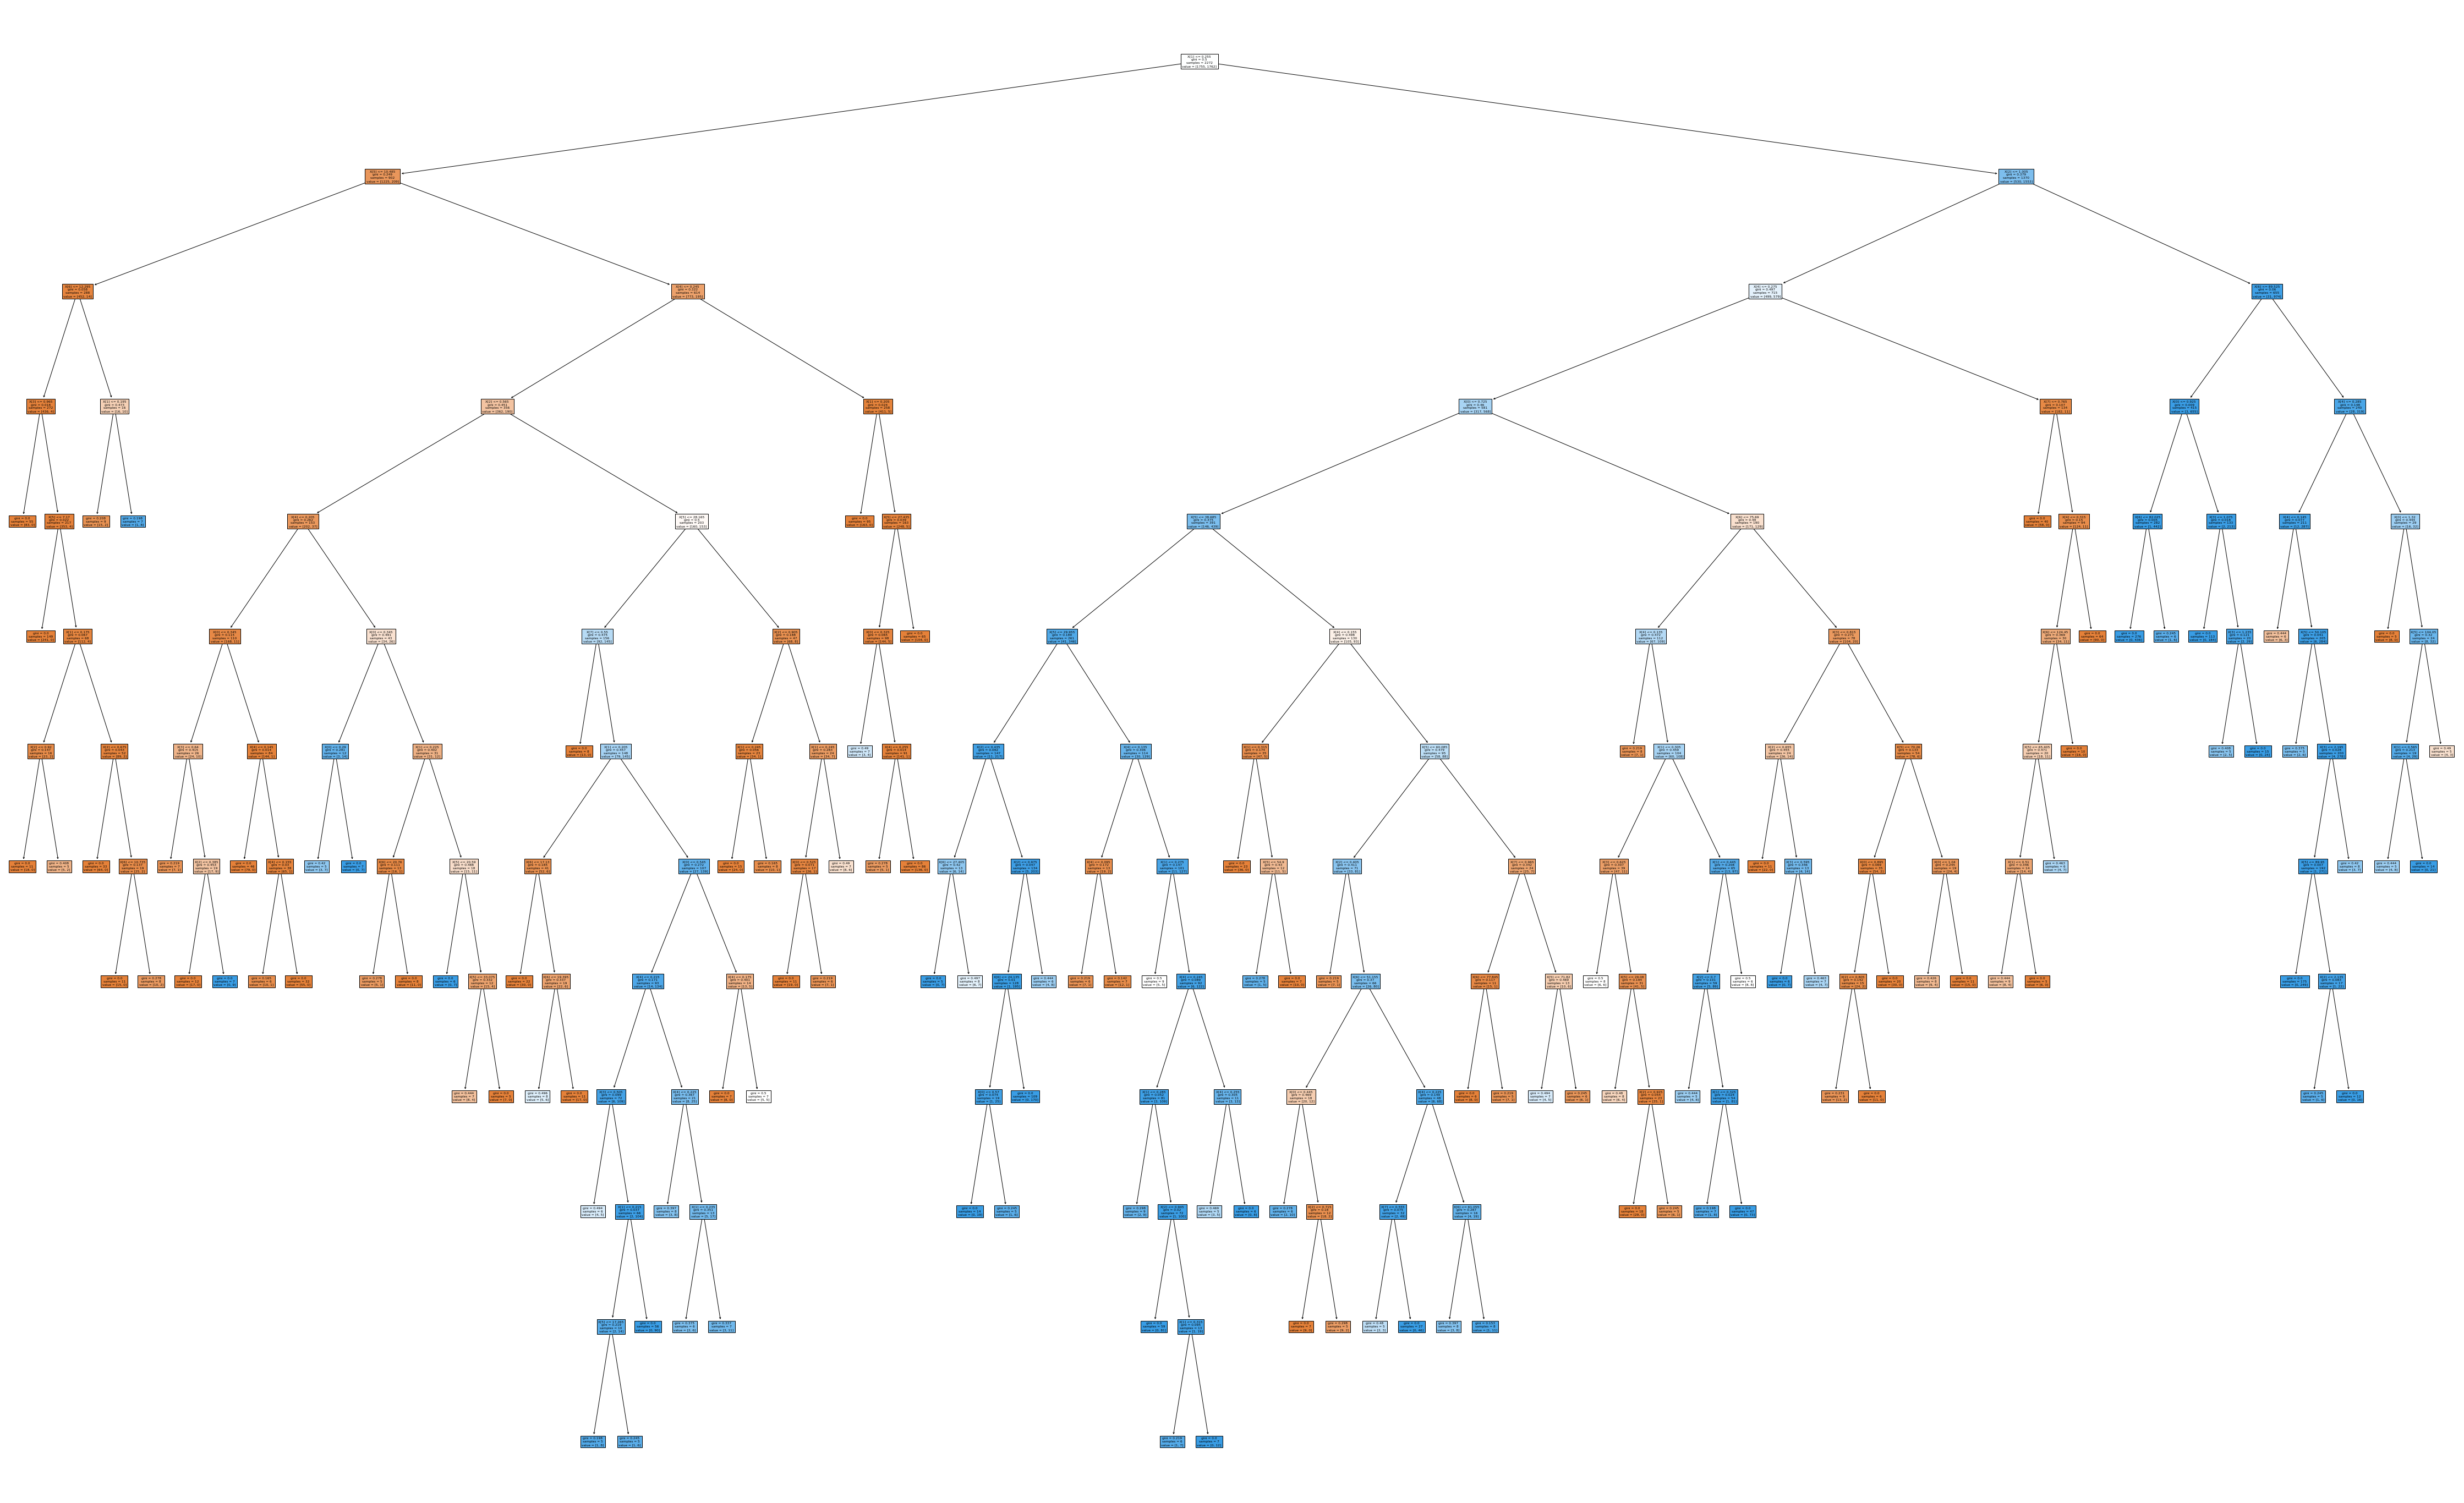

In [489]:
plt.figure(figsize=(80,50))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.9556438495085571